# ESG CO2 순배출량 추이 분석

작성자: 문성원  

작성목적: KDT 교육용 파이썬 pandas, numpy, seaborn, sklearn 실습 목적 코드  

작성일: 2025-02-10 (월)  


* 본 파일은 KDT 교육을 위한 Sample 코드이므로 작성자에게 모든 저작권이 있습니다.

변경사항 내역(날짜, 변경목적, 변경내용 순으로 기입)  
1. 2025-02-10 (월) / 최초 작성 / 최초 작성

## 데이터 로드

In [1]:
import pandas as pd
df = pd.read_csv('ESG_CO2_2021.csv')
df.head(10)

,year,Net
0,1990,254159.2211
1,1991,281385.5253
2,1992,310216.9541
3,1993,346994.1520
4,1994,369637.1600
5,1995,401626.6678
6,1996,434432.7187
7,1997,461298.0841
8,1998,382505.5031
9,1999,412334.4732


## EDA

### 데이터 구조 확인

In [2]:
# 데이터 구조(컬럼명, 유효한 값 개수, 변수 타입) 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    32 non-null     int64  
 1   Net     32 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 640.0 bytes


### 기초통계량

In [3]:
# 모든 열의 기초통계량 (값의 개수, 평균, 표준편차, 최소값, 1분위수, 중앙값, 3분위수, 최대값)
df.describe()

,year,Net
count,32.000000,32.000000
mean,2005.500000,511113.240587
std,9.380832,124286.844277
min,1990.000000,254159.221100
25%,1997.750000,428908.157325
50%,2005.500000,507308.536350
75%,2013.250000,638025.741225
max,2021.000000,684683.642100


### 결측치

In [4]:
# 열별 결측치 개수 확인
df.isna().sum()

year    0
Net     0
dtype: int64

In [5]:
# 모든 열 데이터 타입 출력
for col in df.columns:
    print(col, '열의 데이터 타입: ', end='')
    print(df[col].dtypes) # 데이터 타입

year 열의 데이터 타입: int64
Net 열의 데이터 타입: float64


In [6]:
# 날짜로 변환이 필요한 경우 변환 - 추후 결정
# df['year'] = pd.to_datetime(df['year'], format='%Y')

### 시각화

In [7]:
import warnings

# 모든 경고 무시 (시각화에서 경고 메세지가 자주 출력되기 때문)
warnings.simplefilter("ignore")

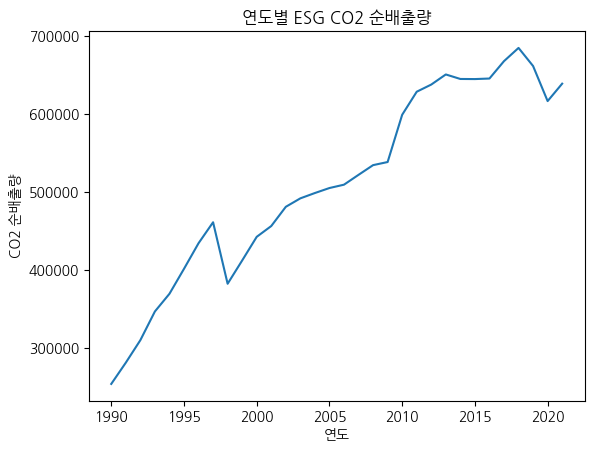

In [18]:
# matplotlib의 pyplot 버전

import matplotlib.pyplot as plt
import koreanize_matplotlib # ipynb에서 한글 출력 가능 라이브러리

# ✅ Retina 디스플레이 설정 (고해상도 그래프)
%config InlineBacked.figure_format = 'retina'

# 그래프 그리기
plt.plot(df['year'], df['Net']) # plot 생성 후 선그래프 그리기

# 제목 및 레이블 추가
plt.title('연도별 ESG CO2 순배출량')
plt.xlabel('연도')
plt.ylabel('CO2 순배출량')

# 그래프 저장
image_file_path = 'image/CO2_pyplot.png'
plt.savefig(image_file_path)

# 그래프 표시
plt.show()

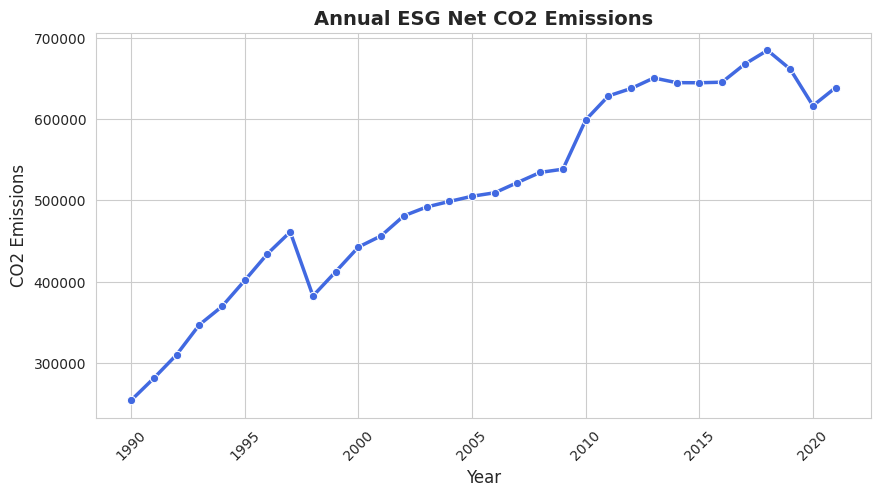

In [19]:
# seaborn 버전

import seaborn as sns

# Seaborn 스타일 설정 (격자와 부드러운 라인)
with sns.axes_style("whitegrid"), sns.color_palette("pastel"):
    # 그래프 그리기
    plt.figure(figsize=(10, 5))  # 그래프 크기 조절
    ax = sns.lineplot(x=df['year'], y=df['Net'], marker="o", linewidth=2.5, color="royalblue")

    # 제목 및 레이블 추가
    ax.set_title("Annual ESG Net CO2 Emissions", fontsize=14, fontweight="bold")
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("CO2 Emissions", fontsize=12)

    # x축 눈금 회전
    plt.xticks(rotation=45)

    # 그래프 저장
    image_file_path = 'image/CO2_seaborn.png'
    plt.savefig(image_file_path)

    # 그래프 표시
    plt.show()

In [223]:
np.arange()

2027

## 모델 학습

### 라이브러리 찾기

In [28]:
# 라이브러리 이름이 기억나지 않을 때 웹 서핑 없이 찾을 수 있는 방법

import sklearn
print(sklearn.__all__) # scikit-learn 안의 모든 세부 라이브러리 출력

['calibration', 'cluster', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'frozen', 'gaussian_process', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'svm', 'tree', 'discriminant_analysis', 'impute', 'compose', 'clone', 'get_config', 'set_config', 'config_context', 'show_versions']


In [24]:
import sklearn.linear_model

print(sklearn.linear_model.__all__)

['ARDRegression', 'BayesianRidge', 'ElasticNet', 'ElasticNetCV', 'HuberRegressor', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'LogisticRegression', 'LogisticRegressionCV', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 'MultiTaskLasso', 'MultiTaskLassoCV', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 'PassiveAggressiveClassifier', 'PassiveAggressiveRegressor', 'Perceptron', 'QuantileRegressor', 'Ridge', 'RidgeCV', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SGDRegressor', 'SGDOneClassSVM', 'TheilSenRegressor', 'enet_path', 'lars_path', 'lars_path_gram', 'lasso_path', 'orthogonal_mp', 'orthogonal_mp_gram', 'ridge_regression', 'RANSACRegressor', 'PoissonRegressor', 'GammaRegressor', 'TweedieRegressor']


In [30]:
from sklearn.linear_model import LinearRegression

print(help(LinearRegression)) # LinearRegression의 가이드 출력

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

### 모델학습

In [141]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df[['year']] # X는 2차원 배열 형태로 들어가야 하기 때문에 대괄호를 이중으로 작성
y = df['Net'] # y는 1차원도 가능

idx = int(len(df['year']) * 0.8)

X_train, X_test, y_train, y_test = X[:idx], X[idx:], y[:idx], y[idx:] # 시계열 데이터이기 때문에 과거 데이터를 Train, 미래 데이터를 Test로 분리

reg = LinearRegression().fit(X_train, y_train) # 모델 학습

### 평가지표

$R^2 Score$

In [142]:
print('Train R squared Score: ', reg.score(X_train, y_train))
print('Test R squared Score: ', reg.score(X_test, y_test))

Train R squared Score:  0.9454093296015208
Test R squared Score:  -10.596104718352494


$MSE$

In [144]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('Train MSE: ', mse_train)

y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Test MSE: ', mse_test)

Train MSE:  654394937.5313376
Test MSE:  4846885404.614174


$RMSE$ : 단위가 y값과 동일하여 값의 크고 작음을 파악하기 좋음

In [145]:
print('Train RMSE: ', np.sqrt(mse_train))
print('Test RMSE: ', np.sqrt(mse_test))

Train RMSE:  25581.144179479885
Test RMSE:  69619.57630303544


### 모델 학습 시각화

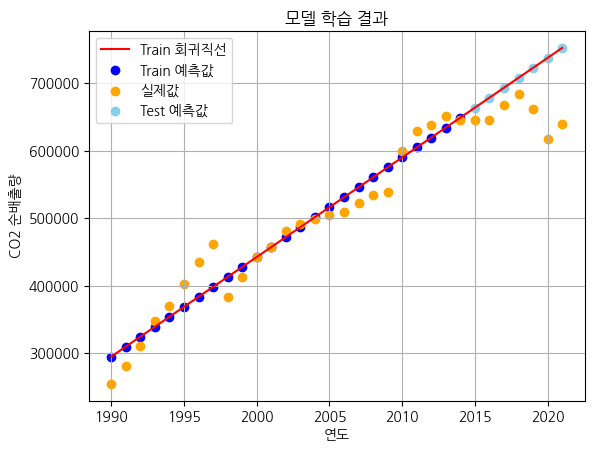

In [198]:
# 그래프 그리기
plt.plot(np.vstack((X_train, X_test)), np.vstack((y_train_pred.reshape(-1,1), y_test_pred.reshape(-1,1))), label='Train 회귀직선', color='red') # Train 회귀 직선
plt.scatter(X_train, y_train_pred, label='Train 예측값', color='blue') # Train 예측값
plt.scatter(X, y, label='실제값', color='orange') # 실제값
plt.scatter(X_test, y_test_pred, label='Test 예측값', color='skyblue') # Test 예측값

# 제목 및 레이블 추가
plt.title('모델 학습 결과')
plt.xlabel('연도')
plt.ylabel('CO2 순배출량')
plt.legend() # 범례
plt.grid()

# 그래프 저장
image_file_path = 'image/CO2_train.png'
plt.savefig(image_file_path)

# 그래프 표시
plt.show()

### 모델 예측

In [148]:
# 마지막 연도 확인
print(df['year'].tail(5))

27    2017
28    2018
29    2019
30    2020
31    2021
Name: year, dtype: int64


In [149]:
X_pred = np.arange(2022,2027,1).reshape(-1, 1)
y_pred = reg.predict(X_pred)

### 모델 예측 시각화

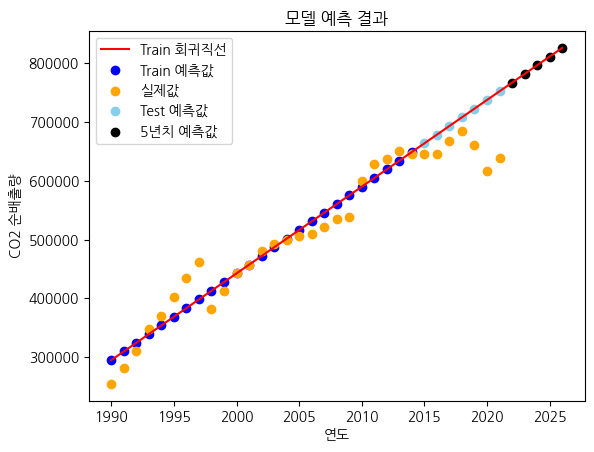

In [199]:
# 그래프 그리기
plt.plot(np.vstack((X_train, X_test, X_pred)), np.vstack((y_train_pred.reshape(-1,1), y_test_pred.reshape(-1,1), y_pred.reshape(-1,1))), label='Train 회귀직선', color='red') # Train 회귀 직선
plt.scatter(X_train, y_train_pred, label='Train 예측값', color='blue') # Train 예측값
plt.scatter(X, y, label='실제값', color='orange') # 실제값
plt.scatter(X_test, y_test_pred, label='Test 예측값', color='skyblue') # Test 예측값
plt.scatter(X_pred, y_pred, label='5년치 예측값', color='black') # 5년치 예측값

# 제목 및 레이블 추가
plt.title('모델 예측 결과')
plt.xlabel('연도')
plt.ylabel('CO2 순배출량')
plt.legend() # 범례

# 그래프 저장
image_file_path = 'image/CO2_test.png'
plt.savefig(image_file_path)

# 그래프 표시
plt.show()

['calibration', 'cluster', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'frozen', 'gaussian_process', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'svm', 'tree', 'discriminant_analysis', 'impute', 'compose', 'clone', 'get_config', 'set_config', 'config_context', 'show_versions']
['ARDRegression', 'BayesianRidge', 'ElasticNet', 'ElasticNetCV', 'HuberRegressor', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'LogisticRegression', 'LogisticRegressionCV', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 'MultiTaskLasso', 'MultiTaskLassoCV', 'OrthogonalMatchingPursuit', 'OrthogonalMa

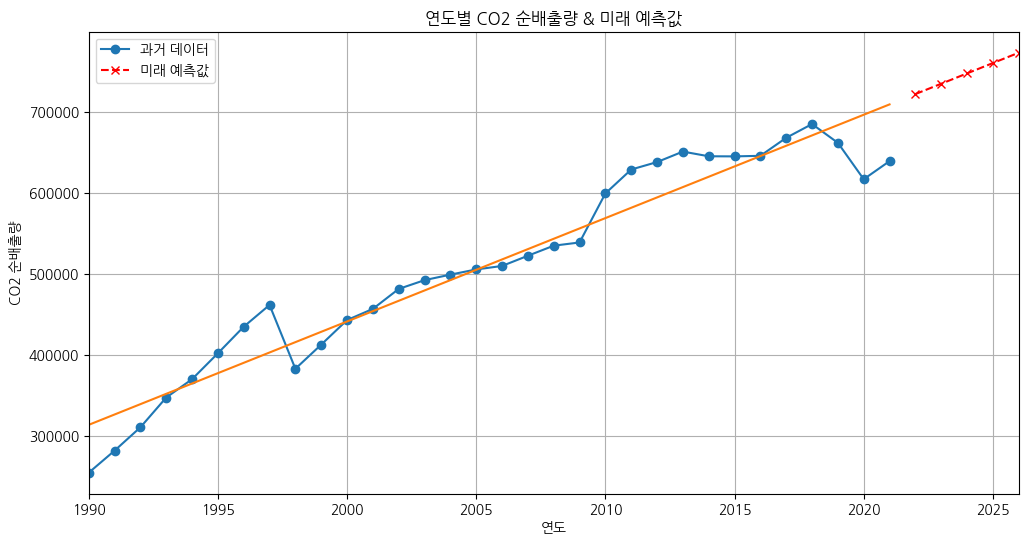

In [220]:
### 라이브러리 찾기
# 라이브러리 이름이 기억나지 않을 때 웹 서핑 없이 찾을 수 있는 방법
import sklearn
print(sklearn.__all__) # scikit-learn 안의 모든 세부 라이브러리 출력

import sklearn.linear_model
print(sklearn.linear_model.__all__)

from sklearn.linear_model import LinearRegression
print(help(LinearRegression)) # LinearRegression의 가이드 출력

### 모델학습
X = df[['year']] # X는 2차원 배열 형태로 들어가야 하기 때문에 대괄호를 이중으로 작성
y = df['Net'] # y는 1차원도 가능

reg = LinearRegression().fit(X, y) # 모델 학습

### 평가지표
# R^2 Score
print('Train R squared Score: ', reg.score(X, y))

# MSE
from sklearn.metrics import mean_squared_error
y_train = reg.predict(X)
mse_train = mean_squared_error(y, y_train)
print('Train MSE: ', mse_train)

# RMSE : 단위가 y값과 동일하여 값의 크고 작음을 파악하기 좋음
import numpy as np
print('Train RMSE: ', np.sqrt(mse_train))

### 모델 예측
last_year = df['year'].max()

X_pred = np.arange(last_year + 1, last_year + 6, 1).reshape(-1, 1) # 5년치 2차원 배열 생성
y_pred = reg.predict(X_pred) # 예측

### 모델 예측 시각화
# 그래프 크기 조정
plt.figure(figsize=(12,6))
plt.xlim((1990, 2026))

# 그래프 그리기
plt.plot(X, y, label='과거 데이터', marker='o') # 과거 데이터
plt.plot(X_pred, y_pred, label='미래 예측값', color='r', marker = 'x', linestyle = '--') # 5년치 예측값
plt.plot(X, y_train)

# 제목 및 레이블 추가
plt.title('연도별 CO2 순배출량 & 미래 예측값')
plt.xlabel('연도')
plt.ylabel('CO2 순배출량')
plt.legend() # 범례
plt.grid() # 격자

# 그래프 저장
image_file_path = 'image/CO2_test.png'
plt.savefig(image_file_path)

# 그래프 표시
plt.show()
